<a href="https://colab.research.google.com/github/satvik94/Embeddings-from-VGGish/blob/master/VGGish_Embeddings_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGGish Audio Embedding Colab

This colab demonstrates how to extract the AudioSet embeddings, using a VGGish deep neural network (DNN).

#Importing and Testing the VGGish System

Based on the directions at: https://github.com/tensorflow/models/tree/master/research/audioset

In [2]:
!pip install numpy scipy
!pip install resampy tensorflow six
!pip install tf_slim
!pip install soundfile

     |████████████████████████████████| 512kB 2.7MB/s 
  Found existing installation: tensorflow-estimator 1.15.0
    Uninstalling tensorflow-estimator-1.15.0:
      Successfully uninstalled tensorflow-estimator-1.15.0
     |████████████████████████████████| 122kB 2.9MB/s 


In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 32913, done.
remote: Total 32913 (delta 0), reused 0 (delta 0), pack-reused 32913
Receiving objects: 100% (32913/32913), 511.80 MiB | 35.34 MiB/s, done.
Resolving deltas: 100% (21101/21101), done.
Checking out files: 100% (2438/2438), done.


In [4]:
# Check to see where are in the kernel's file system.
!pwd

/content


In [5]:
# Grab the VGGish model
!curl -O https://storage.googleapis.com/audioset/vggish_model.ckpt
!curl -O https://storage.googleapis.com/audioset/vggish_pca_params.npz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  277M  100  277M    0     0  94.4M      0  0:00:02  0:00:02 --:--:-- 94.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 73020  100 73020    0     0   214k      0 --:--:-- --:--:-- --:--:--  214k


In [6]:
# Make sure we got the model data.
!ls

models	sample_data  sounds.zip  vggish_model.ckpt  vggish_pca_params.npz


In [7]:
# Verify the location of the VGGish source files
!ls models/research/audioset/vggish

mel_features.py		  vggish_input.py	 vggish_slim.py
README.md		  vggish_params.py	 vggish_smoke_test.py
vggish_inference_demo.py  vggish_postprocess.py  vggish_train_demo.py


In [0]:
# Copy the source files to the current directory.
!cp models/research/audioset/vggish/* .

In [9]:
# Make sure the source files got copied correctly.
!ls

mel_features.py  vggish_inference_demo.py  vggish_postprocess.py
models		 vggish_input.py	   vggish_slim.py
README.md	 vggish_model.ckpt	   vggish_smoke_test.py
sample_data	 vggish_params.py	   vggish_train_demo.py
sounds.zip	 vggish_pca_params.npz


In [10]:
# Run the test, which also loads all the necessary functions.
from vggish_smoke_test import *

W0324 08:32:07.122956 139993460287360 deprecation.py:323] From /tensorflow-1.15.0/python2.7/tensorflow_core/python/compat/v2_compat.py:68: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term



Testing your install of VGGish



W0324 08:32:11.321290 139993460287360 deprecation.py:323] From /tensorflow-1.15.0/python2.7/tensorflow_core/contrib/layers/python/layers/layers.py:1057: apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.


Log Mel Spectrogram example:  [[-4.47297436 -4.29457354 -4.14940631 ... -3.9747003  -3.94774997
  -3.78687669]
 [-4.48589533 -4.28825497 -4.139964   ... -3.98368686 -3.94976505
  -3.7951698 ]
 [-4.46158065 -4.29329706 -4.14905953 ... -3.96442484 -3.94895483
  -3.78619839]
 ...
 [-4.46152626 -4.29365061 -4.14848608 ... -3.96638113 -3.95057575
  -3.78538167]
 [-4.46152595 -4.2936572  -4.14848104 ... -3.96640507 -3.95059567
  -3.78537143]
 [-4.46152565 -4.29366386 -4.14847603 ... -3.96642906 -3.95061564
  -3.78536116]]


W0324 08:32:11.458520 139993460287360 deprecation.py:323] From /tensorflow-1.15.0/python2.7/tensorflow_core/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


VGGish embedding:  [0.         0.         0.         0.         0.         0.
 0.         0.16137305 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.8069579
 0.         0.         0.         0.         0.         0.
 0.         0.36792767 0.0358243  0.         0.         0.
 0.         0.38027033 0.13755944 0.9174706  0.8065635  0.
 0.         0.         0.         0.04036267 0.7076243  0.
 0.497839   0.24081804 0.2156543  0.884923   1.1956801  0.6706196
 0.20779456 0.0163987  0.17471854 0.         0.         0.2510081
 0.         0.         0.14607906 0.         0.3988705  0.30542105
 0.12896752 0.         0.         0.         0.         0.
 0.53851354 0.         0.         0.04941072 0.42527407 0.18537286
 0.         0.         0.14753528 0.         0.         0.69933873
 0.45541185 0.05174828 0.         0.01992542 0.         0.
 0.5181578  0.5655761  0.6587975  0.         0.         0.41056335
 0.         0.         0.         0.2576519

#Using the VGGish System

In [0]:
import vggish_slim
import vggish_params
import vggish_input
import soundfile as sf

def CreateVGGishNetwork(hop_size=0.96):   # Hop size is in seconds.
  """Define VGGish model, load the checkpoint, and return a dictionary that points
  to the different tensors defined by the model.
  """
  vggish_slim.define_vggish_slim()
  checkpoint_path = 'vggish_model.ckpt'
  vggish_params.EXAMPLE_HOP_SECONDS = hop_size
  
  vggish_slim.load_vggish_slim_checkpoint(sess, checkpoint_path)

  features_tensor = sess.graph.get_tensor_by_name(
      vggish_params.INPUT_TENSOR_NAME)
  embedding_tensor = sess.graph.get_tensor_by_name(
      vggish_params.OUTPUT_TENSOR_NAME)

  layers = {'conv1': 'vggish/conv1/Relu',
            'pool1': 'vggish/pool1/MaxPool',
            'conv2': 'vggish/conv2/Relu',
            'pool2': 'vggish/pool2/MaxPool',
            'conv3': 'vggish/conv3/conv3_2/Relu',
            'pool3': 'vggish/pool3/MaxPool',
            'conv4': 'vggish/conv4/conv4_2/Relu',
            'pool4': 'vggish/pool4/MaxPool',
            'fc1': 'vggish/fc1/fc1_2/Relu',
            'fc2': 'vggish/fc2/Relu',
            'embedding': 'vggish/embedding',
            'features': 'vggish/input_features',
         }
  g = tf.get_default_graph()
  for k in layers:
    layers[k] = g.get_tensor_by_name( layers[k] + ':0')
    
  return {'features': features_tensor,
          'embedding': embedding_tensor,
          'layers': layers,
         }

In [0]:
# Creating the network
import tensorflow as tf
tf.reset_default_graph()
sess = tf.Session()

vgg = CreateVGGishNetwork(0.96) # The input number represents the duration of the sound file in seconds.


In [0]:
def EmbeddingsFromVGGish(vgg, x, sr):
  '''Run the VGGish model, starting with a sound (x) at sample rate
  (sr). Return a dictionary of embeddings from the different layers
  of the model.'''
  # Produce a batch of log mel spectrogram examples.
  input_batch = vggish_input.waveform_to_examples(x, sr)
  # print('Log Mel Spectrogram example: ', input_batch[0])

  layer_names = vgg['layers'].keys()
  tensors = [vgg['layers'][k] for k in layer_names]
  
  results = sess.run(tensors,
                     feed_dict={vgg['features']: input_batch})

  resdict = {}
  for i, k in enumerate(layer_names):
    resdict[k] = results[i]
    
  return resdict

In [14]:
""" 
Import data into Colab.
Load the wav files as a zip file into PWD. Name the zip file as sounds.
"""
from zipfile import ZipFile
zip_name = "sounds.zip"

with ZipFile(zip_name, 'r') as zip:
  zip.extractall('sounds')
  print("Extracted all sound files into the folder named 'sounds'!!")

Extracted all sound files into the folder named 'sounds'!!


In [27]:
"""
Load all the files into a list.
"""
print("The contents of the 'sounds' folder is ")
!ls sounds/
import glob
sounds = glob.glob('sounds/*.wav')

The contents of the 'sounds' folder is 
acomic.wav  amal.wav  bathroom1.wav  china.wav	diamond.wav


In [28]:
"""
This code cell extracts embeddings from the sound files added to the list. 
"""

# Extract embeddings from first sound file.
print("Extracting embeddings from " + sounds[0])
in_signal, in_sr = sf.read(sounds[0])
resdict = EmbeddingsFromVGGish(vgg, in_signal, in_sr)
em0 = resdict['embedding']
print("The shape of em0 is" + str(em0.shape))
em = np.copy(em0)

# Extract embeddings from remaining files.
for s in sounds[1:]:
  print("Extracting embeddings from " + s)
  in_signal, in_sr = sf.read(s)
  resdict = EmbeddingsFromVGGish(vgg, in_signal, in_sr)
  em_s = resdict['embedding']
  print("The shape of em_s is" + str(em_s.shape))
  em = np.concatenate((em, em_s), axis = 0)
  print("The shape of em is" + str(em.shape))

Extracting embeddings from sounds/china.wav
The shape of em0 is(31, 128)
Extracting embeddings from sounds/amal.wav
The shape of em_s is(31, 128)
The shape of em is(62, 128)
Extracting embeddings from sounds/bathroom1.wav
The shape of em_s is(31, 128)
The shape of em is(93, 128)
Extracting embeddings from sounds/diamond.wav
The shape of em_s is(31, 128)
The shape of em is(124, 128)
Extracting embeddings from sounds/acomic.wav
The shape of em_s is(31, 128)
The shape of em is(155, 128)


In [0]:
"""
Store the numpy matrices.
"""
np.save("embeddings.npy", em)


In [30]:
"""
Load the numpy arrays
"""
em_load = np.load("embeddings.npy")
print("em_load shape is {}".format(em_load.shape))

np.array_equal(em, em_load)

em_load shape is (155, 128)


True

In [0]:
# Testing numpy concatenate
#a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a = np.array([[]])
b = np.array([[10, 11, 12], [13, 14, 15], [16, 17, 18]])
print("a is {}".format(a))
print("b is {}".format(b))
c = np.concatenate((a, b), axis = 1)
print("a and b concatenation is {}".format(c))

a is []
b is [[10 11 12]
 [13 14 15]
 [16 17 18]]


ValueError: ignored

In [0]:
in_signal, in_sr = sf.read('acomic.wav')
resdict = EmbeddingsFromVGGish(vgg, in_signal, in_sr)

In [0]:
for k in resdict:
  print k, resdict[k].shape

fc1 (31, 4096)
fc2 (31, 128)
features (31, 96, 64)
conv3 (31, 24, 16, 256)
conv2 (31, 48, 32, 128)
conv1 (31, 96, 64, 64)
embedding (31, 128)
conv4 (31, 12, 8, 512)
pool3 (31, 12, 8, 256)
pool2 (31, 24, 16, 128)
pool1 (31, 48, 32, 64)
pool4 (31, 6, 4, 512)


In [0]:
print resdict['embedding'].shape

(31, 128)


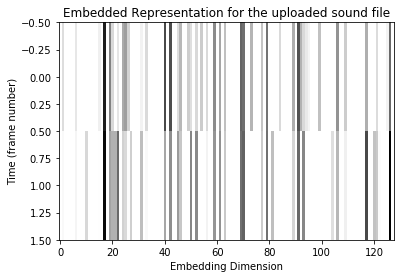

In [0]:
import matplotlib.pyplot as plt
plt.imshow(resdict['embedding'][0:2][:].reshape(2, 128), 
           aspect='auto', cmap='binary')
plt.xlabel('Embedding Dimension')
plt.ylabel('Time (frame number)')
plt.title('Embedded Representation for the uploaded sound file')
plt.grid(False);

#Showing the graph

In [0]:
# Note : Tested with Chrome 66 -- might not work with all browsers :-(

# Let's visualize our graph!
# Tip: to make your graph more readable you can add a
# name="..." parameter to the individual Ops.

# src: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb

import numpy as np
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [0]:
show_graph(tf.get_default_graph())